# Probability distributions Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seed = 5885
rng = np.random.default_rng(seed)

In [2]:
# We'll need this a few times, so write a function to take the x values and 
# plot a histogram comparing to the analytic function func
def plot_distribution(x, func, y_log=True):
    plt.clf()
    plt.hist(x, density=True, bins=100, histtype = 'step')
    xx = np.linspace(min(x),max(x),100)
    plt.plot(xx, func(xx),':')
    if y_log:
        plt.yscale('log')
    plt.xlabel('x')
    plt.show()

### Power law 

$f(x) = C x^{-\alpha}$ for $a<x<b$, where $C$ is the normalization factor,

$$\int_a^b C x^{-\alpha} dx = 1\Rightarrow C = (1-\alpha)\left[b^{1-\alpha}-a^{1-\alpha}\right]^{-1}$$

$${dy\over dx} = C x^{-\alpha} \Rightarrow y = {C\over 1-\alpha} \left[x^{1-\alpha}\right]^x_a  = {x^{1-\alpha} - a^{1-\alpha}\over b^{1-\alpha} - a^{1-\alpha}}$$

$$\Rightarrow x =  \left[b^{1-\alpha}y + a^{1-\alpha} (1-y)\right]     ^{1/(1-\alpha)}$$

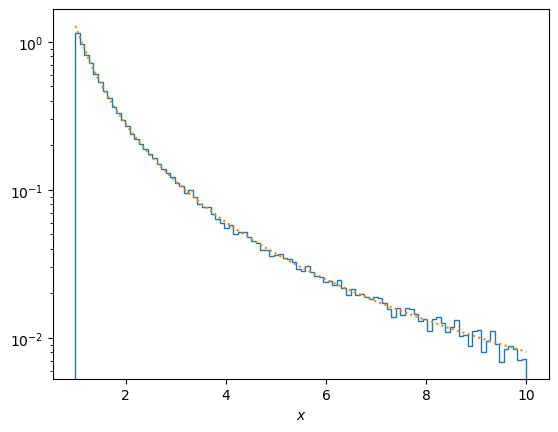

In [3]:
# Power law by transformation
def f(x, a, C):
    return C * x**(-a)

alpha = 2.2
a = 1
b = 10
n = 1-alpha
C = n/(b**n - a**n)

y = rng.uniform(size = 10**5)
x = (b**n*y + a**n*(1-y))**(1/n)

plt.hist(x, density=True, bins=100, histtype = 'step')

# plot the analytic solution, the multiplicative factors account
# for our x-axis being in log_10(x)
xx = np.linspace(a,b,100)
plt.plot(xx, f(xx,alpha,C),':')
plt.yscale('log')
plt.xlabel(r'$x$')
plt.show()

### Lorentzian (Cauchy distribution) by transformation method and ratio of uniforms

$$f(x) = {1\over \pi}{1\over 1+x^2}$$

for $-\infty<x<\infty$

$${dy\over dx} = {1\over \pi}{1\over 1+x^2}\Rightarrow y = {1\over \pi}\left[\arctan(x)\right]^x_{-\infty} = {1\over \pi}\arctan(x) + {1\over 2}$$

$$\Rightarrow x = \tan\left(\pi\left(y-{1\over 2}\right)\right)$$

Number of samples between +-100 = 99397


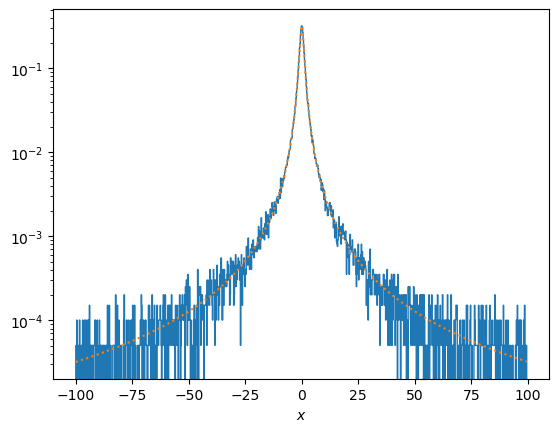

In [4]:
# Lorentzian by transformation method

import scipy.integrate

def f(x):
    return 1 / (np.pi * (1+x**2))

y = rng.uniform(size = 10**5)
x = np.tan(np.pi*(y-0.5))

# trim the x values to focus on the center of the distribution
xtrim = 100.0
x = x[np.where(np.logical_and(x<xtrim, x>-xtrim))]
# and also calculate the new normalization between these limits
norm, err = scipy.integrate.quad(f, -xtrim, xtrim)
print('Number of samples between +-%g = %d' % (xtrim, len(x)))

plt.hist(x, density=True, bins=1000, histtype = 'step')
xx = np.linspace(min(x),max(x),1000)
plt.plot(xx, f(xx)/norm,':')
plt.yscale('log')
plt.xlabel(r'$x$')
plt.show()

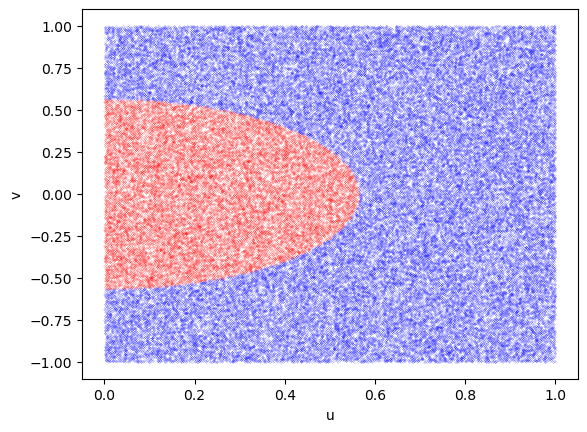

Number of samples between +-100 = 24693


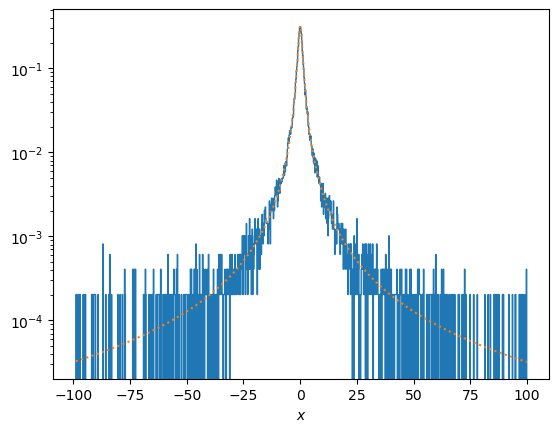

In [5]:
# Lorentzian by ratio of uniforms
def f(x):
    return 1 / (np.pi * (1+x**2))

u = rng.uniform(size = 10**5)
v = -1.0 + 2.0*rng.uniform(size = 10**5)
# choose which points to keep
ind = np.where(u <= np.sqrt(f(v/u)))
ind2 = np.where(u > np.sqrt(f(v/u)))
x = v[ind]/u[ind]

# Plot the points to show which ones are accepted and which rejected
plt.plot(u[ind2],v[ind2], 'bo', ms=0.1)
plt.plot(u[ind],v[ind], 'ro', ms=0.1)
# Plot the analytic solution for the boundary (see below)
#uu = np.linspace(0.001,1.0,100)
#plt.plot(uu, -2*uu*np.log(uu), 'k')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

# trim the x values to focus on the center of the distribution
xtrim = 100.0
x = x[np.where(np.logical_and(x<xtrim, x>-xtrim))]
# and also calculate the new normalization between these limits
norm, err = scipy.integrate.quad(f, -xtrim, xtrim)
print('Number of samples between +-%g = %d' % (xtrim, len(x)))

# Plot the distribution f(x)
plt.hist(x, density=True, bins=1000, histtype = 'step')
xx = np.linspace(min(x),max(x),1000)
plt.plot(xx, f(xx)/norm,':')
plt.yscale('log')
plt.xlabel(r'$x$')
plt.show()

### Gaussian by ratio of uniforms

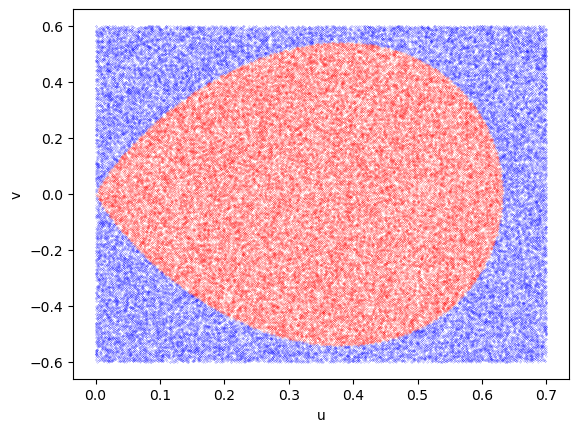

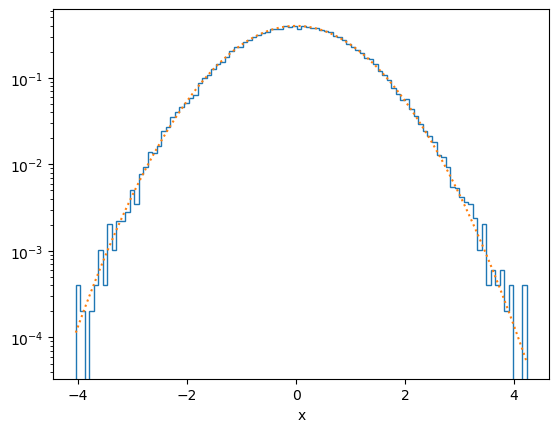

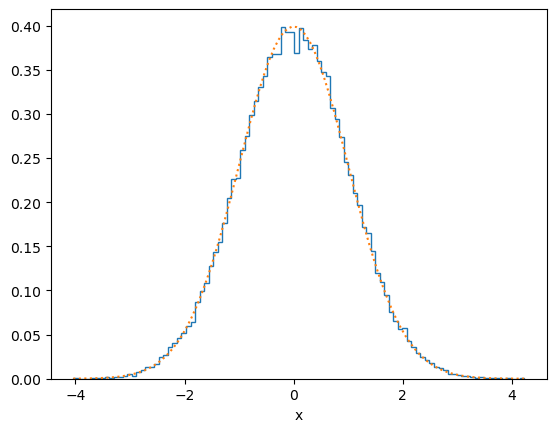

In [6]:
# Gaussian by ratio of uniforms
def f(x):
    return np.exp(-x**2/2)/ np.sqrt(2*np.pi)

u = 0.7*rng.uniform(size = 10**5)
v = -0.6 + 1.2*rng.uniform(size = 10**5)
# choose which points to keep
ind = np.where(u <= np.sqrt(f(v/u)))
ind2 = np.where(u > np.sqrt(f(v/u)))
x = v[ind]/u[ind]

# Plot the points to show which ones are accepted and which rejected
plt.plot(u[ind2],v[ind2], 'bo', ms=0.1)
plt.plot(u[ind],v[ind], 'ro', ms=0.1)
# Plot the analytic solution for the boundary (see below)
#uu = np.linspace(0.001,1.0,100)
#plt.plot(uu, -2*uu*np.log(uu), 'k')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

plot_distribution(x, f)
plot_distribution(x, f, y_log=False)

### Rejection method with importance sampling

Acceptance fraction = 0.16786


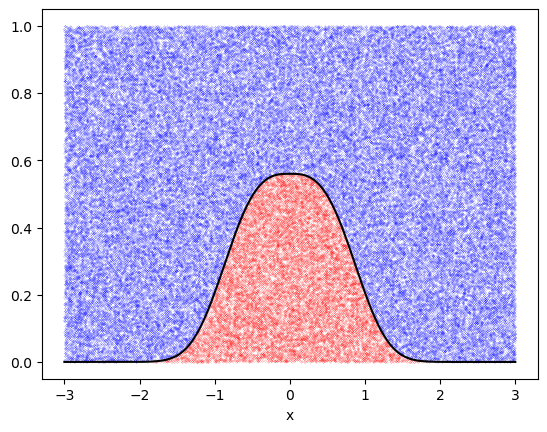

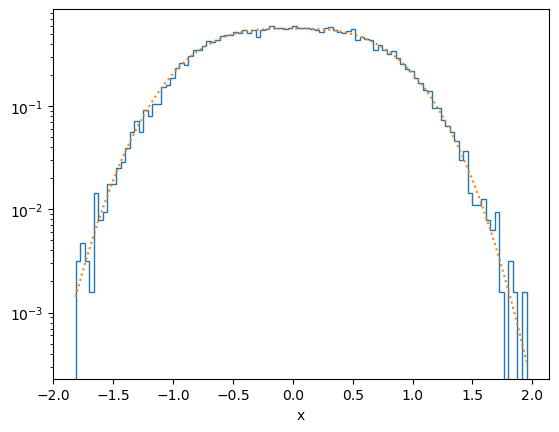

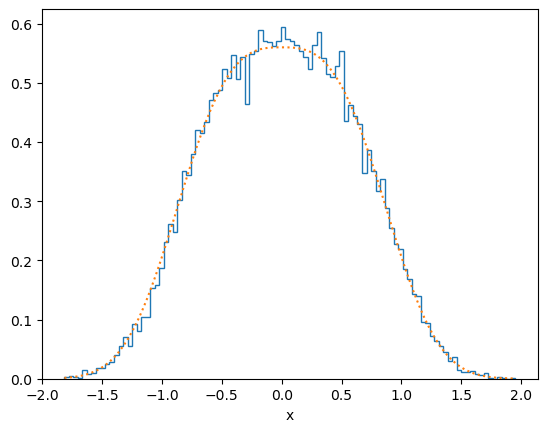

In [7]:
# Rejection method for exp(-|x^3|)

def f(x):
    return np.exp(-np.abs(x**3))/(2*0.89298)

xmax = 3
x = -xmax + 2*xmax*rng.uniform(size = 10**5)    # Generate x values between +-xmax
y = rng.uniform(size = 10**5)

# Reject
ind = np.where(y <= f(x))
ind2 = np.where(y > f(x))

print("Acceptance fraction = %g" % (len(x[ind])/len(x)))

# Plot the points to show which ones are accepted and which rejected
plt.plot(x[ind2],y[ind2], 'bo', ms=0.1)
plt.plot(x[ind],y[ind], 'ro', ms=0.1)
# Plot the analytic solution for the boundary
xx = np.linspace(-xmax,xmax,1000)
plt.plot(xx, f(xx), 'k')
plt.xlabel('x')
plt.show()

plot_distribution(x[ind], f)
plot_distribution(x[ind], f, y_log = False)


Acceptance fraction = 0.66733


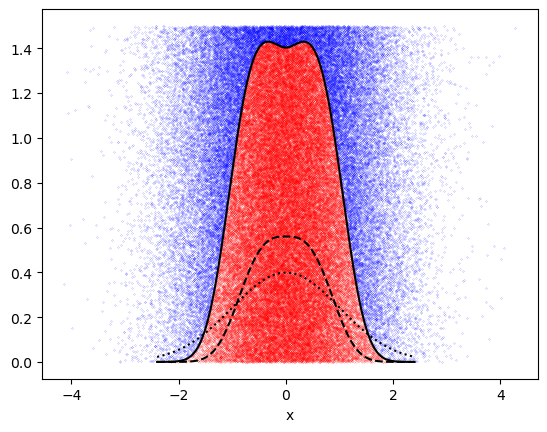

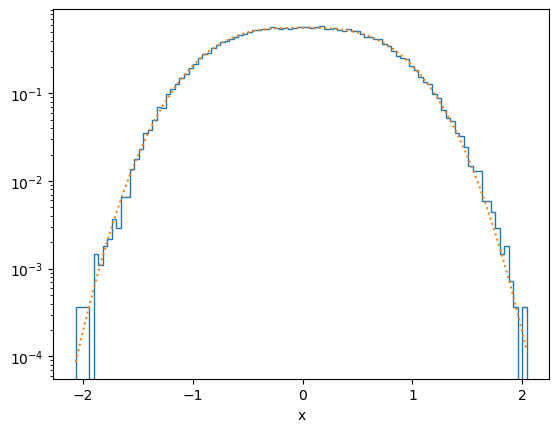

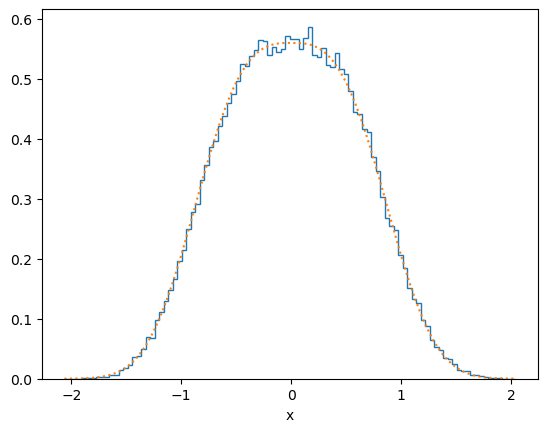

In [8]:
# Rejection method for exp(-|x^3|) but now use importance sampling

def f(x):
    return np.exp(-np.abs(x**3))/(2*0.89298)

def p(x):
    return np.exp(-x**2/2)/(np.sqrt(2*np.pi))

xmax = 2.4
x = rng.normal(size = 10**5)    # Generate x values between +-xmax
y = 1.5*rng.uniform(size = 10**5)

# Reject
ind = np.where(y <= f(x)/p(x))
ind2 = np.where(y > f(x)/p(x))

print("Acceptance fraction = %g" % (len(x[ind])/len(x)))

# Plot the points to show which ones are accepted and which rejected
plt.plot(x[ind2],y[ind2], 'bo', ms=0.1)
plt.plot(x[ind],y[ind], 'ro', ms=0.1)
# Plot the analytic solution for the boundary
xx = np.linspace(-xmax,xmax,1000)
plt.plot(xx, f(xx), 'k--')
plt.plot(xx, p(xx), 'k:')
plt.plot(xx, f(xx)/p(xx), 'k')
plt.xlabel('x')
plt.show()

plot_distribution(x[ind], f)
plot_distribution(x[ind], f, y_log=False)
